In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectKBest, VarianceThreshold, f_classif
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

### 1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [ ]:
data = pd.read_csv("xAPI-Edu-Dataset.csv")
data.info()

In [ ]:
data.rename(columns={"gender":"Gender" ,"NationalITy":"Nationality", "PlaceofBirth":"PlaceOfBirth", "raisedhands":"RaisedHands", "VisITedResources":"VisitedResources", "ParentschoolSatisfaction":"ParentSchoolSatisfaction"}, inplace=True)

In [ ]:
data.head()

In [ ]:
data.describe(include='all')

In [ ]:
for item in data:
    print(item, data[item].isna().sum())

### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.countplot(data, y="Nationality", ax=axs[0], palette="tab20")
axs[0].set_title('Count Plot of Nationality')
sns.countplot(data, y="Topic", ax=axs[1], palette="tab20")
axs[1].set_title('Count Plot of Topic')
plt.show()

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axs[0,0], order=['L','M','H'], palette="Paired")
sns.countplot(x='StageID', data=data, ax=axs[0,1], palette="Paired")
sns.countplot(x='Gender', data=data, ax=axs[1,0], order=['M','F'], palette="Paired")
sns.countplot(x='Semester', data=data, ax=axs[1,1], palette="Paired")
plt.show()

###### Countries having the majority : KW(Kuwait) & Jordan
###### Topic having the majority : IT

### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
sns.color_palette("mako", as_cmap=True)
sns.countplot(data, x="Topic", hue="Gender", ax=axs[0,0], palette="Set2")
axs[0,0].tick_params(axis='x', rotation=90)
sns.countplot(data, x="StageID", hue="Gender", ax=axs[0,1], palette="Set2")
sns.countplot(data, x="StudentAbsenceDays" ,hue="Gender", ax=axs[1,0], palette="Set2")
sns.countplot(data, x="ParentAnsweringSurvey", hue="Gender",ax=axs[1,1], palette="Set2")
plt.show()

##### There are more number of boys than girls in almost all topics.
##### Girls have fewer leaves than boys.


### 4. Visualize categorical variables with numerical variables and give conclusions?


In [ ]:
fig, axs  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisitedResources', data=data, order=['L','M','H'], ax=axs[0,0], hue='Gender',palette="RdYlBu")
sns.barplot(x='Class', y='RaisedHands', data=data, order=['L','M','H'], ax=axs[0,1],hue='Gender',palette="RdYlBu")
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axs[1,0],hue='Gender',palette="RdYlBu")
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axs[1,1],hue='Gender',palette="RdYlBu")
plt.show()

In [ ]:
fig, axs  = plt.subplots(2,1,figsize=(10,10))
sns.stripplot(x='Semester', y='RaisedHands', data=data, ax=axs[0], hue='Gender',palette="BuPu")
sns.swarmplot(x='Class', y='RaisedHands', data=data, ax=axs[1],hue='Gender',palette="BuPu")
plt.show()

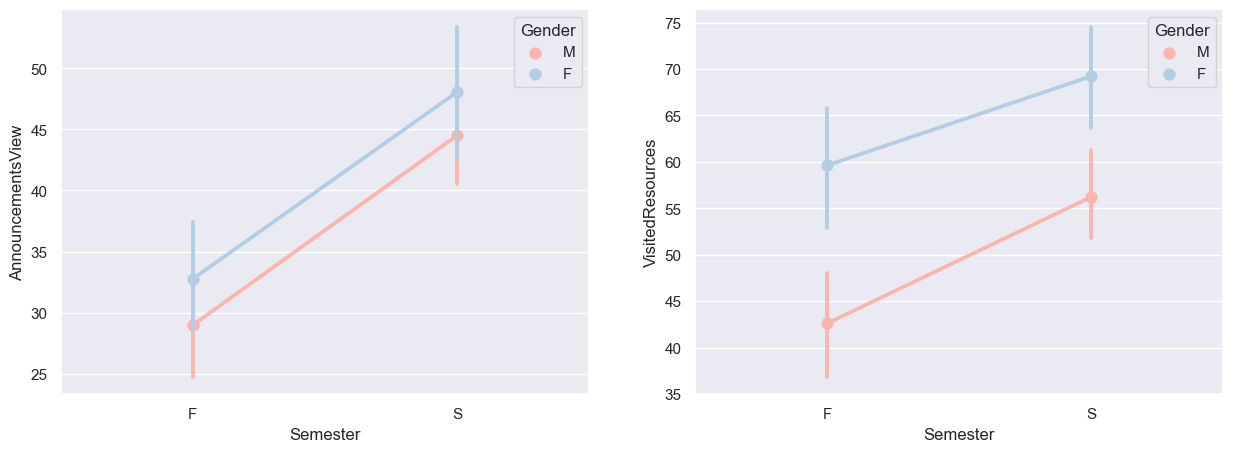

In [18]:
fig, axs  = plt.subplots(1,2,figsize=(15,5))
sns.pointplot(x='Semester', y='AnnouncementsView', data=data, ax=axs[0],hue='Gender',palette="Pastel1")
sns.pointplot(x='Semester', y='VisitedResources', data=data, ax=axs[1],hue='Gender',palette="Pastel1")
plt.show()

##### Announcements and VisitedResources count increased in the second semester as compared to first.
##### The more the student participated in discussions, etc. the better his performance was.

### 5. From the above result, what are the factors that leads to get low grades of the students?

We observed that low attendance is a huge factor that leads to get low grades of students and low involvement in discussions and visiting announcements also leads in low grades of students.

### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.

In [19]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [20]:
x = pd.get_dummies(x, drop_first=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [24]:
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [25]:
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {}%".format(round(acc,2)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 73.61%
[[31  0 13]
 [ 1 27  8]
 [10  6 48]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        44
           1       0.82      0.75      0.78        36
           2       0.70      0.75      0.72        64

    accuracy                           0.74       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.74      0.74      0.74       144


### 7. Justify the model. Tune the model using various techniques, if need be.

#### RFE

In [27]:
selector = RFE(estimator=classifier, n_features_to_select=10, step=1)
selector = selector.fit(x_train, y_train)

x_train_rfe = selector.transform(x_train)
x_test_rfe = selector.transform(x_test)

classifier.fit(x_train_rfe, y_train)

y_pred = classifier.predict(x_test_rfe)

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy after RFE: {}%".format(round(acc,2)))

Accuracy after RFE: 71.53%


### RFE-CV

In [28]:
selector_cv = RFECV(estimator=classifier, step=1, cv=5)
selector_cv = selector_cv.fit(x_train, y_train)

x_train_rfecv = selector_cv.transform(x_train)
x_test_rfecv = selector_cv.transform(x_test)

classifier.fit(x_train_rfecv, y_train)
y_pred_rfecv = classifier.predict(x_test_rfecv)

acc = accuracy_score(y_test, y_pred_rfecv) * 100
print("Accuracy after RFE with CV: {}%".format(round(acc, 2)))

Accuracy after RFE with CV: 70.83%


### SelectKBest

In [29]:
selector_kbest = SelectKBest(score_func=f_classif, k=10)
selector_kbest = selector_kbest.fit(x_train, y_train)

x_train_kbest = selector_kbest.transform(x_train)
x_test_kbest = selector_kbest.transform(x_test)

classifier.fit(x_train_kbest, y_train)
y_pred_kbest = classifier.predict(x_test_kbest)

acc = accuracy_score(y_test, y_pred_kbest) * 100
print("Accuracy after SelectKBest: {}%".format(round(acc, 2)))

Accuracy after SelectKBest: 69.44%


### Variance Threshold

In [30]:
selector_vt = VarianceThreshold(threshold=0.1)
selector_vt = selector_vt.fit(x_train)

x_train_vt = selector_vt.transform(x_train)
x_test_vt = selector_vt.transform(x_test)

classifier.fit(x_train_vt, y_train)
y_pred_vt = classifier.predict(x_test_vt)

acc = accuracy_score(y_test, y_pred_vt) * 100
print("Accuracy after Variance Threshold: {}%".format(round(acc, 2)))

Accuracy after Variance Threshold: 73.61%
